In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
import pandas as pd
import numpy as np

In [4]:
iteminfo_train = pd.read_csv('/kaggle/input/avito-duplicate-ads-detection/ItemInfo_train.csv.zip')

In [5]:
iteminfo_train.head()

,itemID,categoryID,title,description,images_array,attrsJSON,price,locationID,metroID,lat,lon
0,1,81,Продам Камаз 6520,Продам Камаз 6520 20 тонн,"1064094, 5252822, 6645873, 6960145, 9230265","{""Вид техники"":""Грузовики""}",300000.0,648140,NaN,64.686946,30.815924
1,3,14,Yamaha r6,Весь в тюнинге.,"11919573, 14412228, 3204180, 6646877","{""Вид техники"":""Мотоциклы"", ""Вид мотоцикла"":""С...",300000.0,639040,NaN,55.678037,37.256548
2,4,84,iPhone 3gs 8gb,"Телефон в хорошем состоянии, трещин и сколов н...","14384831, 6102021","{""Вид телефона"":""iPhone""}",3500.0,640650,NaN,56.239398,43.460458
3,7,84,Xiaomi Mi4 3гб RAM + 16гб ROM белый,"Отличный подарок на новый год от ""китайской ap...",NaN,"{""Вид телефона"":""Другие марки""}",13500.0,662210,NaN,55.777170,37.586194
4,8,39,Лыжные ботинки,"Лыжные ботинки в хорошем состоянии, 34 размер","13718854, 4787310","{""Вид товара"":""Зимние виды спорта""}",500.0,624360,NaN,55.777170,37.586194


In [6]:
itempairs_train = pd.read_csv('/kaggle/input/avito-duplicate-ads-detection/ItemPairs_train.csv.zip')

In [7]:
location = pd.read_csv('/kaggle/input/avito-duplicate-ads-detection/Location.csv.zip')
category = pd.read_csv('/kaggle/input/avito-duplicate-ads-detection/Category.csv.zip')

In [8]:
itempairs_train.head()

,itemID_1,itemID_2,isDuplicate,generationMethod
0,1,4112648,1,1
1,3,1991275,1,1
2,4,1223296,0,1
3,7,1058851,1,1
4,8,2161930,1,1


In [9]:
location.head()

,locationID,regionID
0,621551,621550
1,621552,621550
2,621553,621550
3,621554,621550
4,621555,621550


In [10]:
category.head()

,categoryID,parentCategoryID
0,9,1
1,10,1
2,11,1
3,14,1
4,19,2


In [11]:
iteminfo_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3344613 entries, 0 to 3344612
Data columns (total 11 columns):
 #   Column        Dtype  
---  ------        -----  
 0   itemID        int64  
 1   categoryID    int64  
 2   title         object 
 3   description   object 
 4   images_array  object 
 5   attrsJSON     object 
 6   price         float64
 7   locationID    int64  
 8   metroID       float64
 9   lat           float64
 10  lon           float64
dtypes: float64(4), int64(3), object(4)
memory usage: 280.7+ MB


In [12]:
#用itemID 把 itempairs_train 合并到 iteminfo_train
itempairs_train1 = itempairs_train.merge(iteminfo_train,left_on='itemID_1', right_on='itemID', how='left')
itempairs_train2 = itempairs_train1.merge(iteminfo_train,left_on='itemID_2', right_on='itemID', how='left')

In [13]:
itempairs_train2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2991396 entries, 0 to 2991395
Data columns (total 26 columns):
 #   Column            Dtype  
---  ------            -----  
 0   itemID_1          int64  
 1   itemID_2          int64  
 2   isDuplicate       int64  
 3   generationMethod  int64  
 4   itemID_x          int64  
 5   categoryID_x      int64  
 6   title_x           object 
 7   description_x     object 
 8   images_array_x    object 
 9   attrsJSON_x       object 
 10  price_x           float64
 11  locationID_x      int64  
 12  metroID_x         float64
 13  lat_x             float64
 14  lon_x             float64
 15  itemID_y          int64  
 16  categoryID_y      int64  
 17  title_y           object 
 18  description_y     object 
 19  images_array_y    object 
 20  attrsJSON_y       object 
 21  price_y           float64
 22  locationID_y      int64  
 23  metroID_y         float64
 24  lat_y             float64
 25  lon_y             float64
dtypes: float64(8),

In [14]:
itempairs_train3 = itempairs_train2.merge(location,left_on='locationID_x', right_on='locationID', how='left')
itempairs_train4 = itempairs_train3.merge(location,left_on='locationID_y', right_on='locationID', how='left')

itempairs_train5 = itempairs_train4.merge(category,left_on='categoryID_x', right_on='categoryID', how='left')
train = itempairs_train5.merge(category,left_on='categoryID_y', right_on='categoryID', how='left')

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:9203: FutureWarning: Passing 'suffixes' which cause duplicate columns {'locationID_x'} in the result is deprecated and will raise a MergeError in a future version.
  validate=validate,
/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:9203: FutureWarning: Passing 'suffixes' which cause duplicate columns {'categoryID_x'} in the result is deprecated and will raise a MergeError in a future version.
  validate=validate,


In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2991396 entries, 0 to 2991395
Data columns (total 34 columns):
 #   Column              Dtype  
---  ------              -----  
 0   itemID_1            int64  
 1   itemID_2            int64  
 2   isDuplicate         int64  
 3   generationMethod    int64  
 4   itemID_x            int64  
 5   categoryID_x        int64  
 6   title_x             object 
 7   description_x       object 
 8   images_array_x      object 
 9   attrsJSON_x         object 
 10  price_x             float64
 11  locationID_x        int64  
 12  metroID_x           float64
 13  lat_x               float64
 14  lon_x               float64
 15  itemID_y            int64  
 16  categoryID_y        int64  
 17  title_y             object 
 18  description_y       object 
 19  images_array_y      object 
 20  attrsJSON_y         object 
 21  price_y             float64
 22  locationID_y        int64  
 23  metroID_y           float64
 24  lat_y               floa

In [16]:
train.to_csv('/kaggle/working/t.csv')

In [17]:
train = pd.read_csv('/kaggle/working/t.csv')

In [18]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2991396 entries, 0 to 2991395
Data columns (total 35 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Unnamed: 0          int64  
 1   itemID_1            int64  
 2   itemID_2            int64  
 3   isDuplicate         int64  
 4   generationMethod    int64  
 5   itemID_x            int64  
 6   categoryID_x        int64  
 7   title_x             object 
 8   description_x       object 
 9   images_array_x      object 
 10  attrsJSON_x         object 
 11  price_x             float64
 12  locationID_x        int64  
 13  metroID_x           float64
 14  lat_x               float64
 15  lon_x               float64
 16  itemID_y            int64  
 17  categoryID_y        int64  
 18  title_y             object 
 19  description_y       object 
 20  images_array_y      object 
 21  attrsJSON_y         object 
 22  price_y             float64
 23  locationID_y        int64  
 24  metroID_y           floa

In [19]:
train.head(5)

,Unnamed: 0,itemID_1,itemID_2,isDuplicate,generationMethod,itemID_x,categoryID_x,title_x,description_x,images_array_x,...,lat_y,lon_y,locationID_x.1,regionID_x,locationID_y.1,regionID_y,categoryID_x.1,parentCategoryID_x,categoryID_y.1,parentCategoryID_y
0,0,1,4112648,1,1,1,81,Продам Камаз 6520,Продам Камаз 6520 20 тонн,"1064094, 5252822, 6645873, 6960145, 9230265",...,64.686946,30.815924,648140,648070,648140,648070,81,1,81,1
1,1,3,1991275,1,1,3,14,Yamaha r6,Весь в тюнинге.,"11919573, 14412228, 3204180, 6646877",...,55.678037,37.256548,639040,637680,639040,637680,14,1,14,1
2,2,4,1223296,0,1,4,84,iPhone 3gs 8gb,"Телефон в хорошем состоянии, трещин и сколов н...","14384831, 6102021",...,56.239398,43.460458,640650,640310,640650,640310,84,6,84,6
3,3,7,1058851,1,1,7,84,Xiaomi Mi4 3гб RAM + 16гб ROM белый,"Отличный подарок на новый год от ""китайской ap...",NaN,...,56.135459,47.235484,662210,662000,662210,662000,84,6,84,6
4,4,8,2161930,1,1,8,39,Лыжные ботинки,"Лыжные ботинки в хорошем состоянии, 34 размер","13718854, 4787310",...,55.777170,37.586194,624360,624300,624360,624300,39,7,39,7


In [20]:
train[['description_x','description_y']].head(20)

,description_x,description_y
0,Продам Камаз 6520 20 тонн,Продам Камаз 6520 20 тонн
1,Весь в тюнинге.,Весь в тюнинге. Возможен торг
2,"Телефон в хорошем состоянии, трещин и сколов н...","В отличном состоянии, в комплекте зарядник и к..."
3,"Отличный подарок на новый год от ""китайской ap...","Отличный подарок на новый год от ""китайской ap..."
4,"Лыжные ботинки в хорошем состоянии, 34 размер","Ботинки 34 размер, в хорошем состоянии"
5,"сноубордические ботинки Nitro Team\nразмер 42,...","ботинки Nitro Team\nразмер 42,5\n28см, 10 us\n..."
6,Машина новая пробег реальный. Не битая не краш...,Машина как новая. Комплектация максимальная- п...
7,Машина новая пробег реальный. Не битая не краш...,Машина в идеальном состояний. Не битая не краш...
8,"Телевизоры кинескопные, диагональ от 37 см. до...",Кинескопный. Отличное состояние. Великолепное ...
9,"качественная, производство Казань, хорошее сос...","в отличном состоянии, можно мерить с 48 по 52 ..."


In [21]:
train[['title_x','title_y']].head(20)

,title_x,title_y
0,Продам Камаз 6520,Продам Камаз 6520
1,Yamaha r6,Yamaha R6
2,iPhone 3gs 8gb,iPhone 3gs 32gb
3,Xiaomi Mi4 3гб RAM + 16гб ROM белый,Смартфон Xiaomi Mi4 3гб RAM + 16гб ROM белый
4,Лыжные ботинки,Ботинки для лыж
5,Сноуборд ботинки Nitro Team 10 us,Сноубордические ботинки
6,"LADA Priora, 2015","LADA Priora, 2015"
7,"LADA Priora, 2015","LADA Priora, 2015"
8,Телевизор,Panasonic 72 см. 100Hz
9,Шуба мутоновая,Шуба норковая


In [22]:
""" 
# cannot be used due to failure in installing package: pyemd

import gensim.downloader as api
import nltk
# can use Word Mover’s Distance to calculate the distance between the two 
# since these are product title and descriptions, usually not many stopword

model = api.load('word2vec-ruscorpora-300')

#tokenization
train['tokenized_description_x'] = train_test.apply(lambda row: 
                                               nltk.word_tokenize(row['description_x'], language= 'russian')
                                               if(np.all(pd.notnull(row['description_x']))) else row['description_x']
                                               , axis=1)

train['tokenized_description_y'] = train_test.apply(lambda row: 
                                               nltk.word_tokenize(row['description_y'], language= 'russian')
                                               if(np.all(pd.notnull(row['description_y']))) else row['description_y']
                                               , axis=1)

def calculate_similarity_distance(sentence_1, sentence_2):
    distance = model.wmdistance(sentence_1, sentence_2)
    return distance
train['wm_distance'] = train_test.apply(lambda row: 
                                               calculate_similarity_distance(row['tokenized_description_x'],row['tokenized_description_y'])
                                               if(np.all(pd.notnull(row['description_x']))) else row['description_x']
                                               , axis=1)
""" 

" \n# cannot be used due to failure in installing package: pyemd\n\nimport gensim.downloader as api\nimport nltk\n# can use Word Mover’s Distance to calculate the distance between the two \n# since these are product title and descriptions, usually not many stopword\n\nmodel = api.load('word2vec-ruscorpora-300')\n\n#tokenization\ntrain['tokenized_description_x'] = train_test.apply(lambda row: \n                                               nltk.word_tokenize(row['description_x'], language= 'russian')\n                                               if(np.all(pd.notnull(row['description_x']))) else row['description_x']\n                                               , axis=1)\n\ntrain['tokenized_description_y'] = train_test.apply(lambda row: \n                                               nltk.word_tokenize(row['description_y'], language= 'russian')\n                                               if(np.all(pd.notnull(row['description_y']))) else row['description_y']\n                   

In [23]:
pip install similarity

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.6/132.6 kB 4.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 282.6/282.6 kB 19.4 MB/s eta 0:00:00
  Created wheel for jellyfish: filename=jellyfish-0.9.0-cp37-cp37m-linux_x86_64.whl size=102020 sha256=07398b43a5771bc8194f5db5f0373aba751abaac5a9a22c0f9bec35efc0d5002
  Stored in directory: /root/.cache/pip/wheels/ff/40/ea/9859321b5541c9081e7bddab208d78ce6d48513462dd099e30
Successfully built jellyfish
Note: you may need to restart the kernel to use updated packages.


In [24]:
pip install jaro-winkler

Note: you may need to restart the kernel to use updated packages.


In [25]:
conda install -c conda-forge pyjarowinkler

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 22.9.0
  latest version: 23.1.0

Please update conda by running

    $ conda update -n base -c conda-forge conda



## Package Plan ##

  environment location: /opt/conda

  added / updated specs:
    - pyjarowinkler


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    pyjarowinkler-1.8          |     pyh9f0ad1d_0          11 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          11 KB

The following NEW packages will be INSTALLED:

  pyjarowinkler      conda-forge/noarch::pyjarowinkler-1.8-pyh9f0ad1d_0 None



pyjarowinkler-1.8    | 11 KB     | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done
Retrieving notices: ...working... done


In [26]:
pip install jarowinkler

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 113.7/113.7 kB 5.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [27]:
import jarowinkler

In [28]:
#description和title的数据 需要改成similarity的百分比
import similarity
import pandas as pd
#from similarity.jarowinkler import JaroWinkler
#from jarowinkler import *
from jarowinkler import jarowinkler_similarity

# call similarity method
#jarowinkler = JaroWinkler()
# from similarity.cosine import Cosine

#trainx = train.head(200)
#jarowinkler = JaroWinkler()
train["jarowinkler_sim_title"] = [jarowinkler_similarity(str(i),str(j)) for i,j in zip(train["title_x"],train["title_y"])]
train["jarowinkler_sim_description"] = [jarowinkler_similarity(str(i),str(j)) for i,j in zip(train["description_x"],train["description_y"])]

In [29]:
train.head(20)

,Unnamed: 0,itemID_1,itemID_2,isDuplicate,generationMethod,itemID_x,categoryID_x,title_x,description_x,images_array_x,...,locationID_x.1,regionID_x,locationID_y.1,regionID_y,categoryID_x.1,parentCategoryID_x,categoryID_y.1,parentCategoryID_y,jarowinkler_sim_title,jarowinkler_sim_description
0,0,1,4112648,1,1,1,81,Продам Камаз 6520,Продам Камаз 6520 20 тонн,"1064094, 5252822, 6645873, 6960145, 9230265",...,648140,648070,648140,648070,81,1,81,1,1.000000,1.000000
1,1,3,1991275,1,1,3,14,Yamaha r6,Весь в тюнинге.,"11919573, 14412228, 3204180, 6646877",...,639040,637680,639040,637680,14,1,14,1,0.955556,0.903448
2,2,4,1223296,0,1,4,84,iPhone 3gs 8gb,"Телефон в хорошем состоянии, трещин и сколов н...","14384831, 6102021",...,640650,640310,640650,640310,84,6,84,6,0.959048,0.561137
3,3,7,1058851,1,1,7,84,Xiaomi Mi4 3гб RAM + 16гб ROM белый,"Отличный подарок на новый год от ""китайской ap...",NaN,...,662210,662000,662210,662000,84,6,84,6,0.788961,0.990036
4,4,8,2161930,1,1,8,39,Лыжные ботинки,"Лыжные ботинки в хорошем состоянии, 34 размер","13718854, 4787310",...,624360,624300,624360,624300,39,7,39,7,0.360317,0.694822
5,5,9,694103,1,1,9,39,Сноуборд ботинки Nitro Team 10 us,"сноубордические ботинки Nitro Team\nразмер 42,...","12418395, 9930491",...,644200,643700,644200,643700,39,7,39,7,0.643500,0.743597
6,6,12,5637025,0,1,12,9,"LADA Priora, 2015",Машина новая пробег реальный. Не битая не краш...,"1338189, 1648456, 6321889, 9883716",...,631060,630750,631060,630750,9,1,9,1,1.000000,0.851394
7,7,12,5279740,0,1,12,9,"LADA Priora, 2015",Машина новая пробег реальный. Не битая не краш...,"1338189, 1648456, 6321889, 9883716",...,631060,630750,631060,630750,9,1,9,1,1.000000,0.855662
8,8,15,113701,0,1,15,32,Телевизор,"Телевизоры кинескопные, диагональ от 37 см. до...","11244051, 14467554, 2240467, 5099565, 8002433",...,662810,662530,662810,662530,32,6,32,6,0.000000,0.577432
9,9,16,2467698,0,1,16,27,Шуба мутоновая,"качественная, производство Казань, хорошее сос...","11762574, 316289, 4015142",...,657600,657310,657600,657310,27,5,27,5,0.908192,0.650572


In [30]:
#去掉 重复多余的column

train1 = train.drop(['locationID_x.1','locationID_y.1','categoryID_x.1','categoryID_y.1'],axis = 1)

#metroID有太多 missing data
#title, attrsJSON, description 不是英文
#images 暂时不用
#item id 重复了 
train2 = train1.drop(['Unnamed: 0',  'images_array_x',
                      'images_array_y', 'attrsJSON_x', 'attrsJSON_y', 'generationMethod', 'metroID_x', 
                      'metroID_y','itemID_x', 'itemID_y'], axis=1)
#数据多 所以简单粗暴去掉 NULL
train3 = train2.dropna()

import math 

y = train3.isDuplicate

#price diff 取price小的item的百分比
price = abs(train3.price_x - train3.price_y)/train3[["price_x", "price_y"]].min(axis=1)

#看是不是相同
samelocation = 1*(train3.locationID_x == train3.locationID_y)
description = train3["jarowinkler_sim_description"]
title = train3["jarowinkler_sim_title"]
samecategory = 1*(train3.categoryID_x == train3.categoryID_y)
region = 1*(train3.regionID_x == train3.regionID_y)
parentCategory = 1*(train3.parentCategoryID_x == train3.parentCategoryID_y)

#把lat lon当做x y 坐标，计算distance
lat = abs(train3.lat_x - train3.lat_y)
lon = abs(train3.lon_x - train3.lon_y)
distance = (lat**2 + lon**2)**(.5)


d = {'isDuplicate': y, 'price': price, 'location': samelocation, 
     'distance':distance,
     'description':description, 'title':title, 
     'category': samecategory, 'region': region, 'parentCategory': parentCategory}
X = pd.DataFrame(data=d)

In [31]:
X.to_csv('/kaggle/working/train.csv')

In [32]:
itempairs_test = pd.read_csv('/kaggle/input/avito-duplicate-ads-detection/ItemPairs_test.csv.zip')

In [33]:
iteminfo_test = pd.read_csv('/kaggle/input/avito-duplicate-ads-detection/ItemInfo_test.csv.zip')

In [34]:
#用itemID 把 itempairs_train 合并到 iteminfo_train

itempairs_test1 = itempairs_test.merge(iteminfo_test,left_on='itemID_1', right_on='itemID', how='left')
itempairs_test2 = itempairs_test1.merge(iteminfo_test,left_on='itemID_2', right_on='itemID', how='left')

In [35]:
#把location和category合并过来

itempairs_test3 = itempairs_test2.merge(location,left_on='locationID_x', right_on='locationID', how='left')
itempairs_test4 = itempairs_test3.merge(location,left_on='locationID_y', right_on='locationID', how='left')

itempairs_test5 = itempairs_test4.merge(category,left_on='categoryID_x', right_on='categoryID', how='left')
test = itempairs_test5.merge(category,left_on='categoryID_y', right_on='categoryID', how='left')

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:9203: FutureWarning: Passing 'suffixes' which cause duplicate columns {'locationID_x'} in the result is deprecated and will raise a MergeError in a future version.
  validate=validate,
/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:9203: FutureWarning: Passing 'suffixes' which cause duplicate columns {'categoryID_x'} in the result is deprecated and will raise a MergeError in a future version.
  validate=validate,


In [36]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1044196 entries, 0 to 1044195
Data columns (total 33 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1044196 non-null  int64  
 1   itemID_1            1044196 non-null  int64  
 2   itemID_2            1044196 non-null  int64  
 3   itemID_x            1044196 non-null  int64  
 4   categoryID_x        1044196 non-null  int64  
 5   title_x             1044194 non-null  object 
 6   description_x       1044171 non-null  object 
 7   images_array_x      926463 non-null   object 
 8   attrsJSON_x         1005706 non-null  object 
 9   price_x             914825 non-null   float64
 10  locationID_x        1044196 non-null  int64  
 11  metroID_x           303388 non-null   float64
 12  lat_x               1044196 non-null  float64
 13  lon_x               1044196 non-null  float64
 14  itemID_y            1044196 non-null  int64  
 15  categoryID_y   

In [37]:
test.to_csv('/kaggle/working/te.csv')

In [38]:
test = pd.read_csv('/kaggle/working/te.csv')

In [39]:
#和train一样的过程
test["jarowinkler_sim_title"] = [jarowinkler_similarity(str(i),str(j)) for i,j in zip(test["title_x"],test["title_y"])]
test["jarowinkler_sim_description"] = [jarowinkler_similarity(str(i),str(j)) for i,j in zip(test["description_x"],test["description_y"])]

test1 = test.drop(['locationID_x.1','locationID_y.1','categoryID_x.1','categoryID_y.1'],axis = 1)
test2 = test1.drop(['Unnamed: 0','images_array_x',
                      'images_array_y', 'attrsJSON_x', 'attrsJSON_y', 'metroID_x', 
                      'metroID_y','itemID_x', 'itemID_y'], axis=1)

price1 = abs(test2.price_x - test2.price_y)/test2[["price_x", "price_y"]].min(axis=1)
samelocation1 = 1*(test2.locationID_x == test2.locationID_y)

price1.fillna(price1.mean(), inplace=True) #data imputation using mean value

lat1 = abs(test2.lat_x - test2.lat_y)
lon1 = abs(test2.lon_x - test2.lon_y)
distance1 = (lat1**2 + lon1**2)**(.5)

description1 = test2["jarowinkler_sim_description"]
title1 = test2["jarowinkler_sim_title"] 
samecategory1 = 1*(test2.categoryID_x == test2.categoryID_y)
region1 = 1*(test2.regionID_x == test2.regionID_y)
parentCategory1 = 1*(test2.parentCategoryID_x == test2.parentCategoryID_y)

index = np.array(test2['id'].astype(np.int))

d1 = {'index':index, 'price': price1, 'location': samelocation1, 
     'distance':distance1,
     'description':description1, 'title':title1, 
     'category': samecategory1, 'region': region1, 'parentCategory': parentCategory1}
X1 = pd.DataFrame(data=d1)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:25: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


In [40]:
X1.to_csv('/kaggle/working/test.csv')

3 Boosting Methods

In [41]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics

In [42]:
# import and split data 
train = pd.read_csv('/kaggle/working/train.csv')
X = train.drop(['Unnamed: 0', 'isDuplicate'],axis=1)
y = train[['isDuplicate']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

3.1 Gradient Boosting Machines (GBM)

In [43]:
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=2, max_depth=2, random_state=0)
    gb_clf.fit(X_train, y_train)

    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb_clf.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb_clf.score(X_test, y_test)))

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Learning rate:  0.05
Accuracy score (training): 0.678
Accuracy score (validation): 0.676


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Learning rate:  0.075
Accuracy score (training): 0.681
Accuracy score (validation): 0.679


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Learning rate:  0.1
Accuracy score (training): 0.686
Accuracy score (validation): 0.684


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Learning rate:  0.25
Accuracy score (training): 0.699
Accuracy score (validation): 0.698


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Learning rate:  0.5
Accuracy score (training): 0.704
Accuracy score (validation): 0.703


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Learning rate:  0.75
Accuracy score (training): 0.706
Accuracy score (validation): 0.706


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Learning rate:  1
Accuracy score (training): 0.706
Accuracy score (validation): 0.706


In [44]:
# learning_rate=0.5 has the best result from above
# number of tree can be large
# max feauture = 
gb_clf2 = GradientBoostingClassifier(n_estimators=100, learning_rate=0.5, 
                                     max_features=3, max_depth=5, random_state=0,
                                    )
gb_clf2.fit(X_train, y_train)
predictions = gb_clf2.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))

print("Classification Report")
print(classification_report(y_test, predictions))

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Confusion Matrix:
[[124711  31258]
 [ 39994  69229]]
Classification Report
              precision    recall  f1-score   support

           0       0.76      0.80      0.78    155969
           1       0.69      0.63      0.66    109223

    accuracy                           0.73    265192
   macro avg       0.72      0.72      0.72    265192
weighted avg       0.73      0.73      0.73    265192



In [45]:
predictions_1 = gb_clf2.predict_proba(X_test)[:,1]

In [46]:
fpr0, tpr0, thresholds0 = metrics.roc_curve(y_test, predictions_1)
metrics.auc(fpr0, tpr0)

0.8029325965213421


AdaBoost

Increase weight for the good predictors.


In [47]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from numpy import mean
from numpy import std
from matplotlib import pyplot

In [48]:
# get a list of models to evaluate
def get_models():
    models = dict()
    # define number of trees to consider
    n_trees = [10, 50, 100, 500, 1000]
    for n in n_trees:
        models[str(n)] = AdaBoostClassifier(n_estimators=n)
    return models

In [49]:
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    # define the evaluation procedure
    # https://medium.com/@venkatasujit272/overview-of-cross-validation-3785d5414ece
    cv = RepeatedStratifiedKFold(n_splits=2, n_repeats=2, random_state=1) 
    # evaluate the model and collect the results
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores

In [50]:
models = get_models()
results, names = list(), list()

for name, model in models.items():
    # evaluate the model
    scores = evaluate_model(model, X, y)
    # store the results
    results.append(scores)
    names.append(name)
    # summarize the performance along the way
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

>10 0.701 (0.001)
>50 0.706 (0.000)
>100 0.708 (0.001)
>500 0.711 (0.000)
>1000 0.712 (0.000)


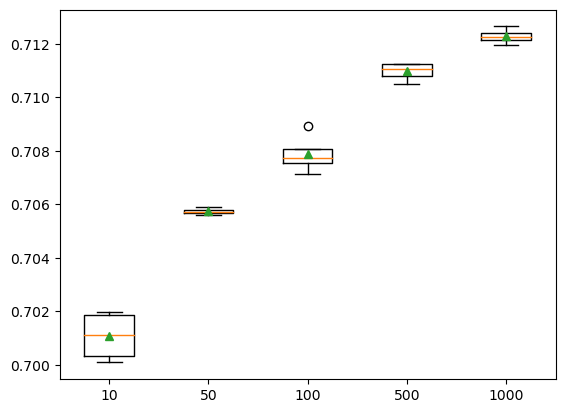

In [51]:
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

In [52]:


ada = AdaBoostClassifier(n_estimators=1000).fit(X_train, y_train)



/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [53]:
ada_predict = ada.predict_proba(X_test)[:,1]

In [54]:
fpr0, tpr0, thresholds0 = metrics.roc_curve(y_test, ada_predict)
metrics.auc(fpr0, tpr0)

0.7840372118185859

In [56]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold

In [57]:
model = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=0.1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=15,
              min_child_weight=3, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [58]:
model1 = model.fit(X_train, y_train)

In [59]:
test = pd.read_csv('/kaggle/working/test.csv')
X1 = test.drop(['Unnamed: 0','index'],axis=1)
#X1 = sc.fit_transform(X1)
y_pred1 = model1.predict_proba(X1)

In [60]:
pred_test1 = y_pred1[:,1]
index = np.array(test['index'].astype(np.int))
pred_test2 = {'id':index,'probability':pred_test1}

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


In [61]:
pred_test3 = pd.DataFrame(pred_test2, columns =['id','probability'])

In [62]:
pred_test3.to_csv('/kaggle/working/prediction_xgboost.csv',index=False)